### 3.2 Classification and regression with a two-layer perceptron

#### 3.2.2 The auto-encoder problem
    

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def error_mse(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((Y-T)**2))

def accuracy(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.sum(abs(T-Y)/2)/len(T)

def phi(x):
    return 2/(1+np.exp(-x))-1


def phi_prime(x):
    return 0.5*((1+phi(x))*(1-phi(x)))

def forward_pass(X,W,V):
    #print(W.shape)
    #print(X.shape)
    H = phi(np.matmul(W,X))
    #print(H.shape)
    H=np.vstack([H,np.ones(np.shape(H)[1])])
    #print(H.shape)
    #print(V.shape)
    O = phi(np.matmul(V,H))
    #print(O.shape)
    return H,O

def backward_pass(O,T,H,V,hidden):
    delta_o = np.multiply((O-T),phi_prime(O))
    #print("hej hopp")
    #print(V.shape)
    #print(delta_y.shape)
    #print(phi_prime(H).shape)
    delta_h = np.multiply(np.matmul(np.transpose(V),delta_o),phi_prime(H))
    delta_h = delta_h[0:hidden]
    return delta_o, delta_h

def update_weights(X,H,W,V,eta,delta_o, delta_h,dw,dv,alpha):
    dw = alpha*dw-(1-alpha)*np.matmul(delta_h,np.transpose(X))
    dv = alpha*dv - (1-alpha)*np.matmul(delta_o,np.transpose(H))
    W = W + dw*eta
    V = V + dv*eta
    return W,V,dw,dv

def backprop(eta,X,T,W,V,hidden,epochs,alpha=0.9):
    weights1 = []
    weights2 = []
    mse_errors = []
    accuracys = []
    #acc = 0
    dw = np.ones(W.shape)
    dv = np.ones(V.shape)
    #print(eta,X,T,W,V,hidden,epochs)
    for i in range(epochs):
        weights1.append(W)
        weights2.append(V)
        H,O = forward_pass(X,W,V)
        mse = error_mse(T,O)
        mse_errors.append(mse)
        acc = accuracy(T,O)
        accuracys.append(acc)
        delta_o,delta_h = backward_pass(O,T,H,V,hidden)
        W,V,dw,dv = update_weights(X,H,W,V,eta,delta_o,delta_h,dw,dv,alpha)
        #print(H)
        #print("print")
        #print(Y)
        
    weights1.append(W)
    weights2.append(V)
    
    return weights1, weights2,mse_errors,accuracys

def predict(validation,W,V, classification = True):
        #print(validation)
        _, prediction = forward_pass(validation,W,V)
        if classification:
            for p in range(prediction.shape[1]):
                if prediction[0,p] >0:
                    prediction[0,p] = 1
                else:
                    prediction[0,p] = -1
            
        return prediction

MSE:  0.2918533916569177


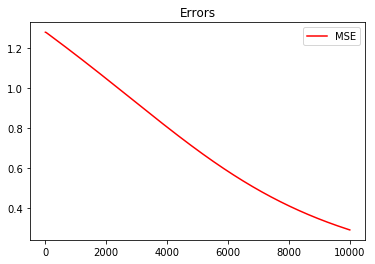

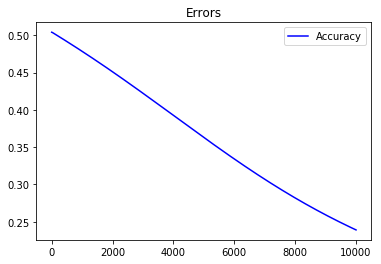

prediction
[[ 1.        ]
 [-0.30290124]
 [-0.51488236]
 [-0.86124305]
 [-0.47885566]
 [-0.20137388]
 [-0.22582812]
 [-0.77205068]]
ground truth
[[ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.055401057142683646


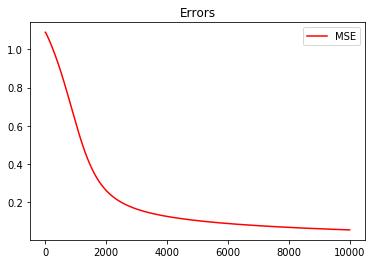

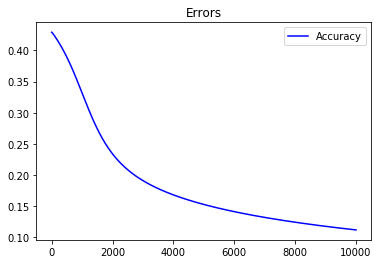

prediction
[[-1.        ]
 [ 0.7803104 ]
 [-0.84922213]
 [-0.77048298]
 [-0.79755223]
 [-0.62136146]
 [-0.83572559]
 [-0.70353782]]
ground truth
[[-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.38802264975774226


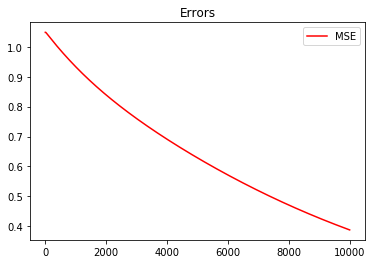

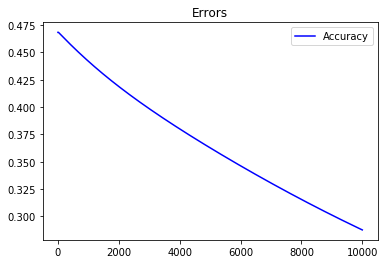

prediction
[[-1.        ]
 [-0.48413286]
 [ 0.10062448]
 [-0.15816043]
 [-0.34883205]
 [-0.85795338]
 [-0.48110368]
 [-0.29165417]]
ground truth
[[-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.34564499133231846


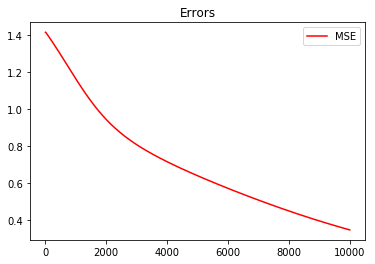

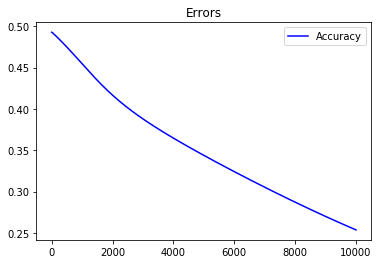

prediction
[[-1.        ]
 [-0.50188652]
 [-0.21581648]
 [ 0.73846952]
 [-0.69721648]
 [-0.54914862]
 [-0.89351088]
 [ 0.10832001]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.3615086702111538


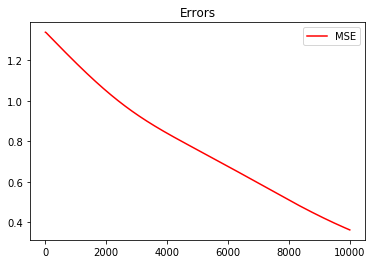

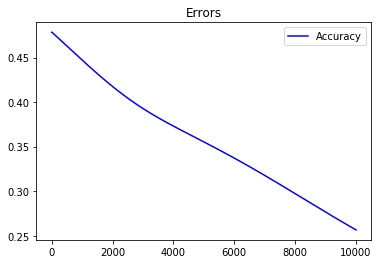

prediction
[[-1.        ]
 [ 0.17136945]
 [-0.71387772]
 [-0.95280859]
 [ 0.35068222]
 [-0.61191583]
 [-0.37996996]
 [-0.39690734]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.22653718302682596


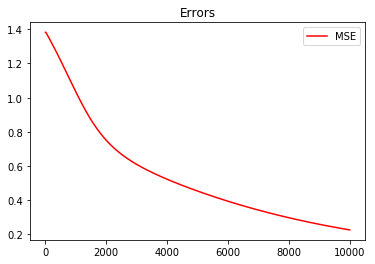

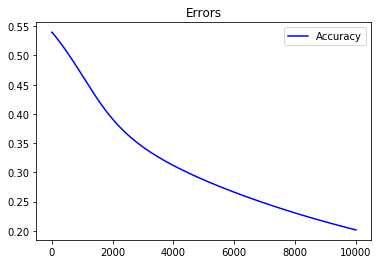

prediction
[[-1.        ]
 [-0.80154653]
 [-0.25034536]
 [-0.7443629 ]
 [-0.90660581]
 [ 0.47859796]
 [-0.16269621]
 [-0.73471467]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.5240325364482012


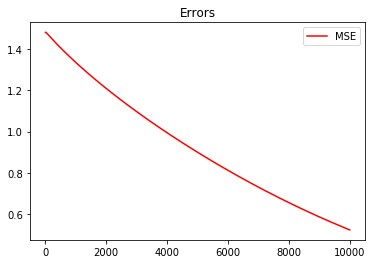

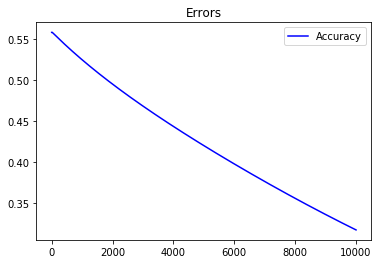

prediction
[[-1.        ]
 [-0.87928423]
 [-0.29264283]
 [ 0.16015339]
 [ 0.06526008]
 [-0.72559439]
 [ 0.1657261 ]
 [-0.60690354]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]]
MSE:  0.5007954969112323


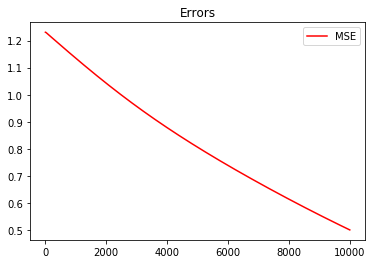

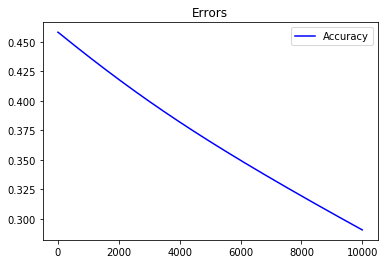

prediction
[[-1.        ]
 [ 0.37901231]
 [-0.47408331]
 [-0.62249261]
 [-0.6386015 ]
 [-0.94246936]
 [-0.09893998]
 [ 0.16717063]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]]
mse
acc


In [25]:
eta = 1e-4
n_in = 8
n_out = 8
scale = 1
hidden_perceptrons = 3
epochs = 10000

class_A = np.eye(n_in)
class_A = np.eye(n_in)
for x in np.nditer(class_A, op_flags = ['readwrite']):
    if x == 0:
        x[...] = -1
X = np.vstack([class_A,np.ones(n_in)])

#print(X)

#print(X.shape)
#print(T)


for i in range(X.shape[1]):
    T = -np.ones(n_in)
    T[i] = 1
    x = X[:,i]
    x = x.reshape(-1,1)
    #x = np.hstack((x,x))
    #print(x)
    T = T.reshape(-1,1)
    W = scale*np.random.randn(hidden_perceptrons,np.shape(x)[0])
    V = scale*np.random.randn(n_out,hidden_perceptrons+1)    
    W_train,V_train,mse,acc = backprop(eta,x,T,W,V,hidden_perceptrons,epochs)
    W_train = np.asarray(W_train)
    V_train = np.asarray(V_train)
    #print(W_train[-1,:,:])
    plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
    plt.legend(handles=[plt_mse])
    print("MSE: ", mse[-1])
    
    #plt.axis([0,20,0,100])
    plt.title('Errors')
    plt.show()
    plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'b',label='Accuracy')
    plt.legend(handles=[plt_acc])
    plt.title('Errors')
    plt.show()
    p = predict(x,W_train[-1,:,:], V_train[-1,:,:],True)
    print("prediction")
    print(p)
    print("ground truth")
    print(x)
    
print("mse")
#print(mse)
print("acc")
#print(acc)

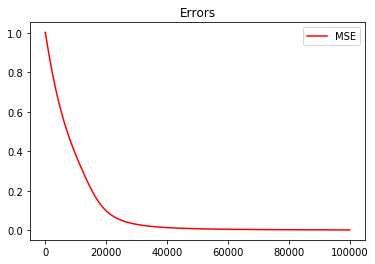

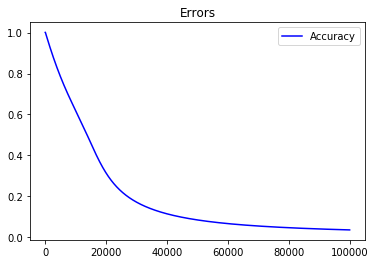

In [9]:
plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
plt.legend(handles=[plt_mse])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()
plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'b',label='Accuracy')
plt.legend(handles=[plt_acc])
plt.title('Errors')
plt.show()

• Does the network always converge and map inputs to themselves? Yes

(100001, 8, 3)


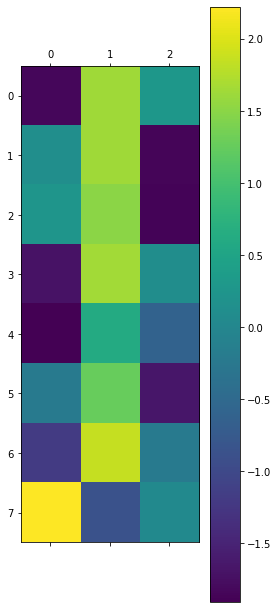

In [33]:
#Showing activation of Hidden layer

print(V_train.shape)
Z = V_train[-1,:,:]
mat = plt.matshow(Z)
plt.colorbar(mat)
plt.show()

#### 3.2.2.3 8-2-8 Arcitechture

MSE:  0.005086262377528233


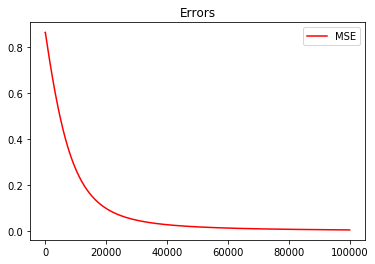

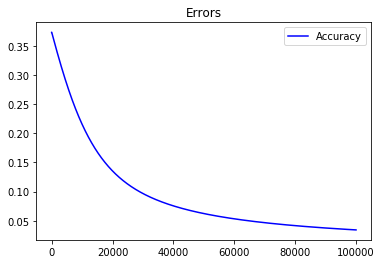

prediction
[[ 1.        ]
 [-0.96862444]
 [-0.90897328]
 [-0.9609518 ]
 [-0.92145337]
 [-0.9218621 ]
 [-0.91472297]
 [-0.91900719]]
ground truth
[[ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.006798392846609007


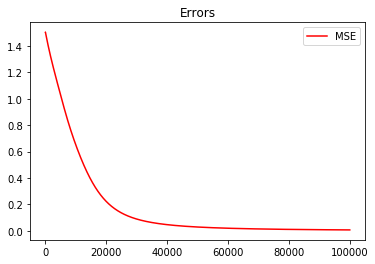

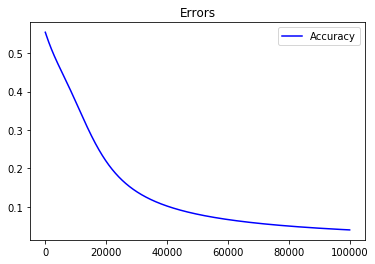

prediction
[[-1.        ]
 [ 0.91316493]
 [-0.91352271]
 [-0.9687868 ]
 [-0.92050775]
 [-0.90537132]
 [-0.91821527]
 [-0.9060425 ]]
ground truth
[[-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.006458909600817568


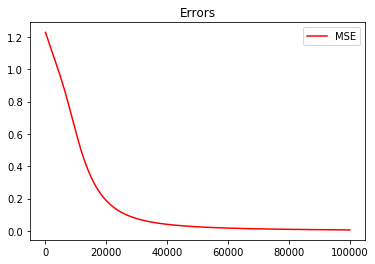

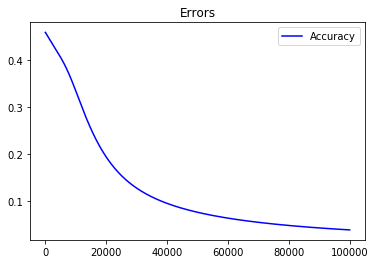

prediction
[[-1.        ]
 [-0.92512928]
 [ 0.90429284]
 [-0.92912853]
 [-0.91195976]
 [-0.911554  ]
 [-0.91027257]
 [-0.9239476 ]]
ground truth
[[-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.007630585232888659


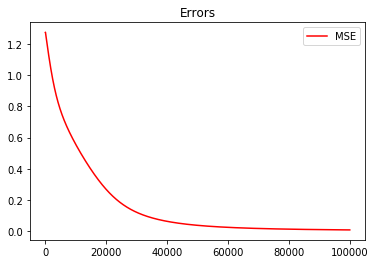

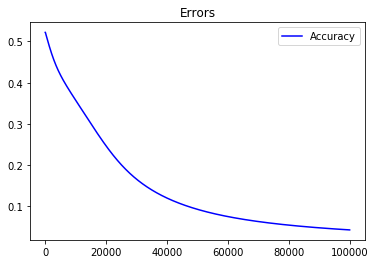

prediction
[[-1.        ]
 [-0.89833514]
 [-0.91675512]
 [ 0.92386269]
 [-0.91213566]
 [-0.92076093]
 [-0.91446957]
 [-0.93545105]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.013765378159577926


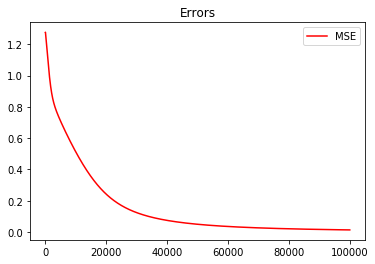

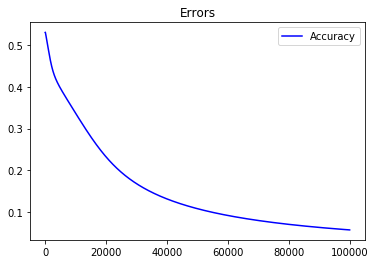

prediction
[[-1.        ]
 [-0.86333496]
 [-0.89599816]
 [-0.87929762]
 [ 0.8889352 ]
 [-0.8690673 ]
 [-0.92654437]
 [-0.90438973]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.006709693685866793


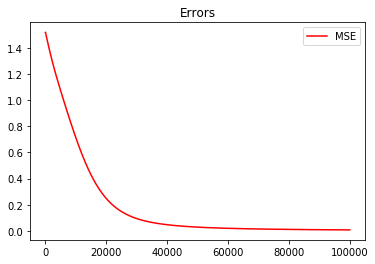

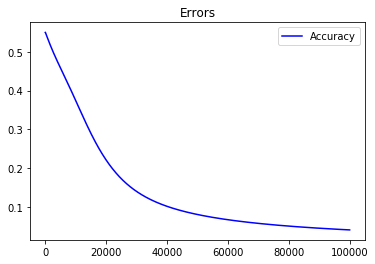

prediction
[[-1.        ]
 [-0.91454868]
 [-0.90536515]
 [-0.89783068]
 [-0.93393327]
 [ 0.93680512]
 [-0.91966433]
 [-0.92382535]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]]
MSE:  0.0060376073311873436


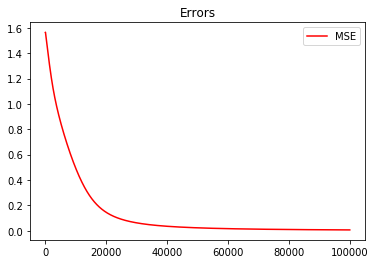

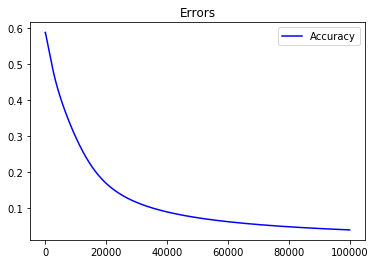

prediction
[[-1.        ]
 [-0.93272108]
 [-0.94257275]
 [-0.91596244]
 [-0.91854499]
 [-0.9229842 ]
 [ 0.90598559]
 [-0.91023468]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]]
MSE:  0.0062588705488075685


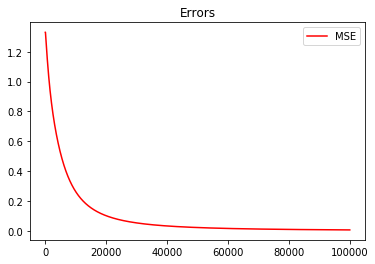

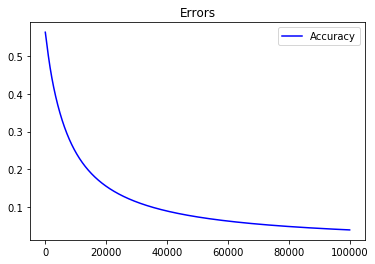

prediction
[[-1.        ]
 [-0.93163569]
 [-0.91535757]
 [-0.92400462]
 [-0.91631827]
 [-0.91686379]
 [-0.92614003]
 [ 0.91756484]]
ground truth
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]]
mse
acc


In [14]:
eta = 1e-4
n_in = 8
n_out = 8
scale = 1
hidden_perceptrons = 2
epochs = 100000

class_A = np.eye(n_in)
class_A = np.eye(n_in)
for x in np.nditer(class_A, op_flags = ['readwrite']):
    if x == 0:
        x[...] = -1
X = np.vstack([class_A,np.ones(n_in)])

#print(X)

#print(X.shape)
#print(T)


for i in range(X.shape[1]):
    T = -np.ones(n_in)
    T[i] = 1
    x = X[:,i]
    x = x.reshape(-1,1)
    #x = np.hstack((x,x))
    #print(x)
    T = T.reshape(-1,1)
    W = scale*np.random.randn(hidden_perceptrons,np.shape(x)[0])
    V = scale*np.random.randn(n_out,hidden_perceptrons+1)    
    W_train,V_train,mse,acc = backprop(eta,x,T,W,V,hidden_perceptrons,epochs)
    W_train = np.asarray(W_train)
    V_train = np.asarray(V_train)
    #print(W_train[-1,:,:])
    plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
    plt.legend(handles=[plt_mse])
    print("MSE: ", mse[-1])
    
    #plt.axis([0,20,0,100])
    plt.title('Errors')
    plt.show()
    plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'b',label='Accuracy')
    plt.legend(handles=[plt_acc])
    plt.title('Errors')
    plt.show()
    p = predict(x,W_train[-1,:,:], V_train[-1,:,:],True)
    print("prediction")
    print(p)
    print("ground truth")
    print(x)
    
print("mse")
#print(mse)
print("acc")
#print(acc)

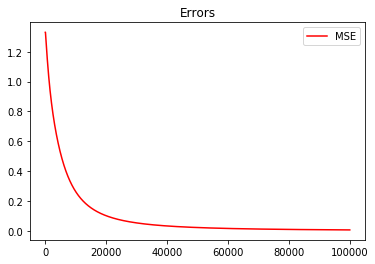

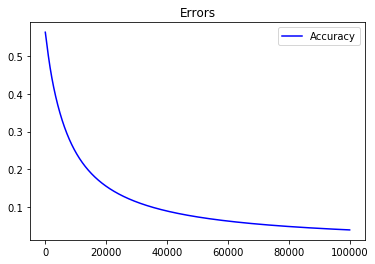

In [15]:
plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
plt.legend(handles=[plt_mse])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()
plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'b',label='Accuracy')
plt.legend(handles=[plt_acc])
plt.title('Errors')
plt.show()

AutoEncoders could serve the purpose of reducing the dimentionality of a problem without neccesarily understading the meaning of the dimensions from a physical perspective. This could be benifitial in for instance optimization applications. 